In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('HR.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df["attrition"] = df["Attrition"]
df.drop(columns = ["Attrition"], inplace = True)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


In [7]:
print(df.dtypes)

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [8]:
#Observation: There are 26 variables which are integers(some of the categorical variables are represented in integer format) and 9 variables that are
#of string datatype.

In [9]:
#Attrition percentage
# Step 1: Count how many employees resigned/retired ("Yes")
yes_count = df["attrition"].value_counts()["Yes"]

# Step 2: Total employees
total_count = len(df["attrition"])

# Step 3: Calculate percentage
percentage = (yes_count / total_count) * 100

# Step 4: Print with 2 decimal places
print("{:.2f}% of the employees resigned/retired".format(percentage))


16.12% of the employees resigned/retired


<Axes: xlabel='attrition', ylabel='count'>

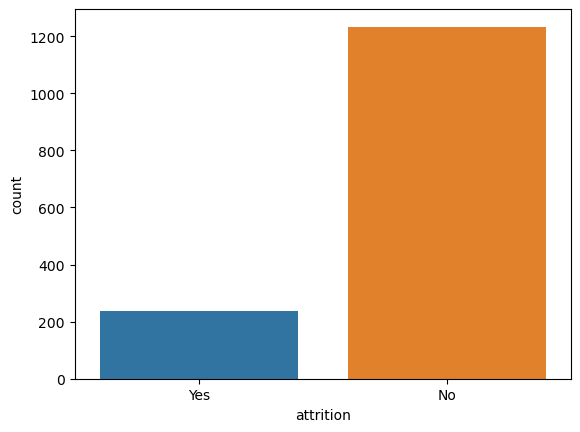

In [10]:
sns.countplot(data=df, x="attrition")

In [11]:
#Observation: The attrition percentage is 16.12% in our dataset, which varies for different companies.

Gender  attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: count, dtype: int64


C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


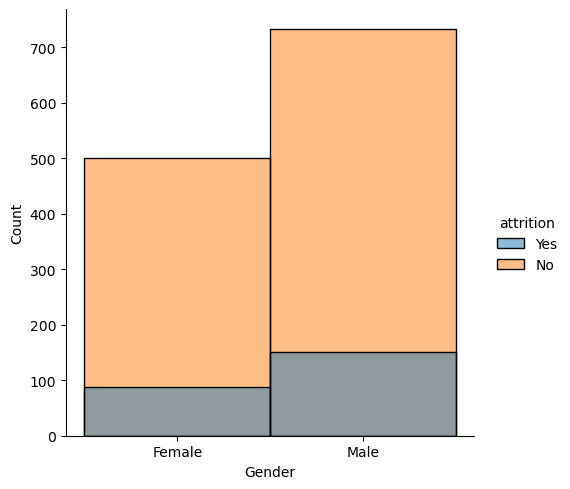

In [12]:
groupby_Gender = df.groupby("Gender")["attrition"]
print(groupby_Gender.value_counts())
sns.displot(data = df, x = "Gender", hue = "attrition")

In [13]:
#Of the total employees resigned/retired, 36.71% are Female
#Of the total employees resigned/retired, 63.29% are Male
#Of the total Male employees, 17.01% resigned/retired
#Of the total Female employees, 14.80% resigned/retired

In [14]:
#Observation: Considering both absolute and percentage values, Male attrition is more than Female attrition.

attrition  BusinessTravel   
No         Travel_Rarely        887
           Travel_Frequently    208
           Non-Travel           138
Yes        Travel_Rarely        156
           Travel_Frequently     69
           Non-Travel            12
Name: count, dtype: int64


C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


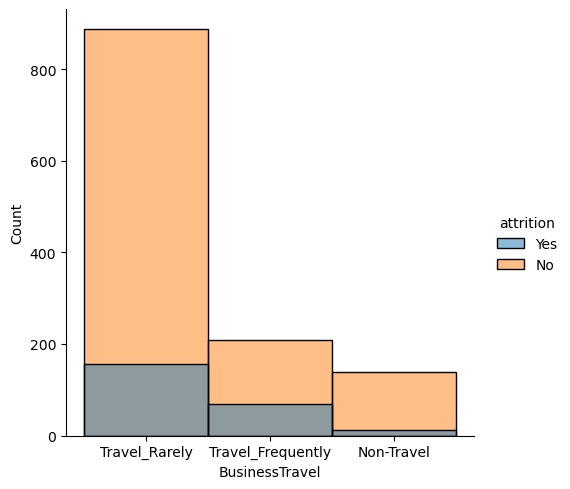

In [15]:
groupby_BusinessTravel = df.groupby("attrition")["BusinessTravel"]
print(groupby_BusinessTravel.value_counts())
sns.displot(data = df, x = "BusinessTravel", hue = "attrition")

In [16]:
#Observation: Considering absolute values, employees traveling rarely resigned/retired mostly (156 employes) and when percentage values are 
#considered, employees traveling frequently resigned/retired mostly (around 25%).

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

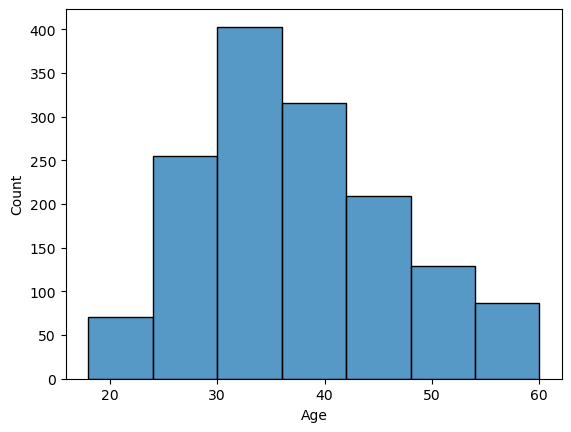

In [17]:
plt.figure()
sns.histplot(data = df, x = 'Age', bins = 7)

In [18]:
#Observation: From above histogram, we can get to know that most of the employees (82%) fall in the working age between 24 and 48.000

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

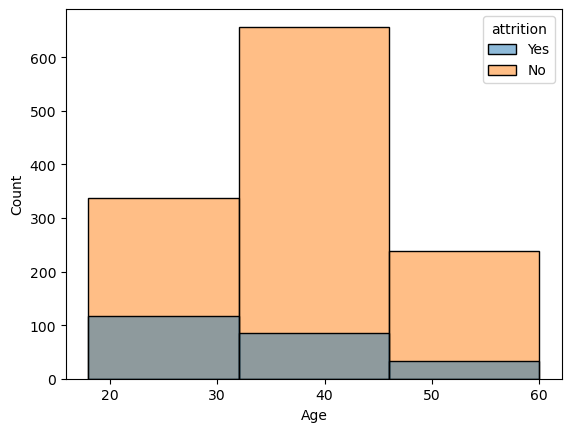

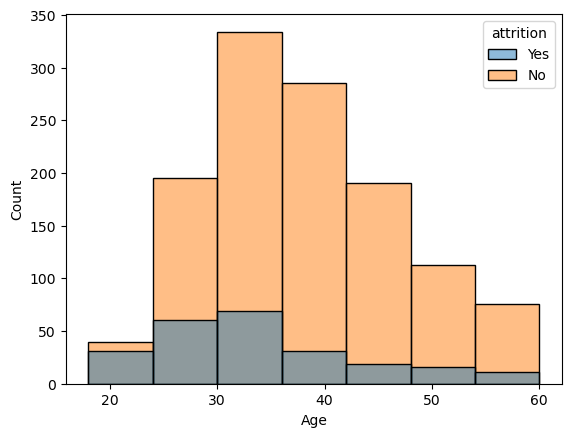

In [19]:
plt.figure()
sns.histplot(data = df, x = "Age", bins = 3, hue = "attrition")
plt.figure()
sns.histplot(data = df, x = "Age", bins = 7, hue = "attrition")

In [20]:
""" Observation: From the histplot (where bins = 3), we can infer that absolute (more than 100 employees) 
and percentage values (around 33%) of employees are resigning whose age is less
than 32. If this percentage value (around 33%) is greater than the industry average
then this should be a cause of worry and the top-level management should try to bring this down by retaining the workforce.
From the histplot (where bins = 7), we can infer that around 45% of the employees whose age is less than 24 resign. 
This number should also be a cause of worry for top-level management """

' Observation: From the histplot (where bins = 3), we can infer that absolute (more than 100 employees) \nand percentage values (around 33%) of employees are resigning whose age is less\nthan 32. If this percentage value (around 33%) is greater than the industry average\nthen this should be a cause of worry and the top-level management should try to bring this down by retaining the workforce.\nFrom the histplot (where bins = 7), we can infer that around 45% of the employees whose age is less than 24 resign. \nThis number should also be a cause of worry for top-level management '

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


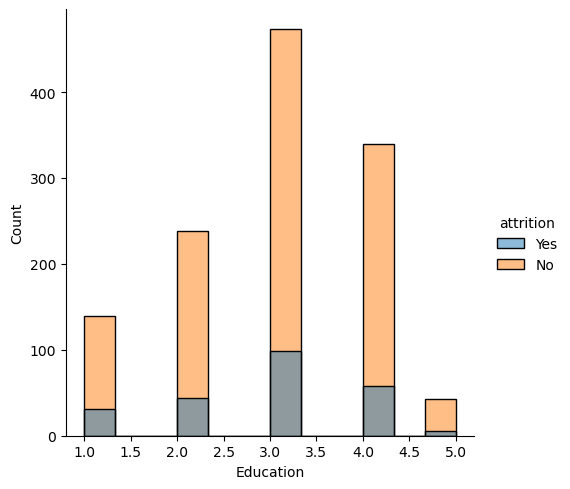

In [21]:
"""
Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'
"""
sns.displot(data = df, x = "Education", hue = "attrition")

In [22]:
"""Observation: Around 100 employees Education = 3 (Bachelor) resigned/retired and around 42% of employees with Bachelor Education resigned/retired."""

'Observation: Around 100 employees Education = 3 (Bachelor) resigned/retired and around 42% of employees with Bachelor Education resigned/retired.'

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


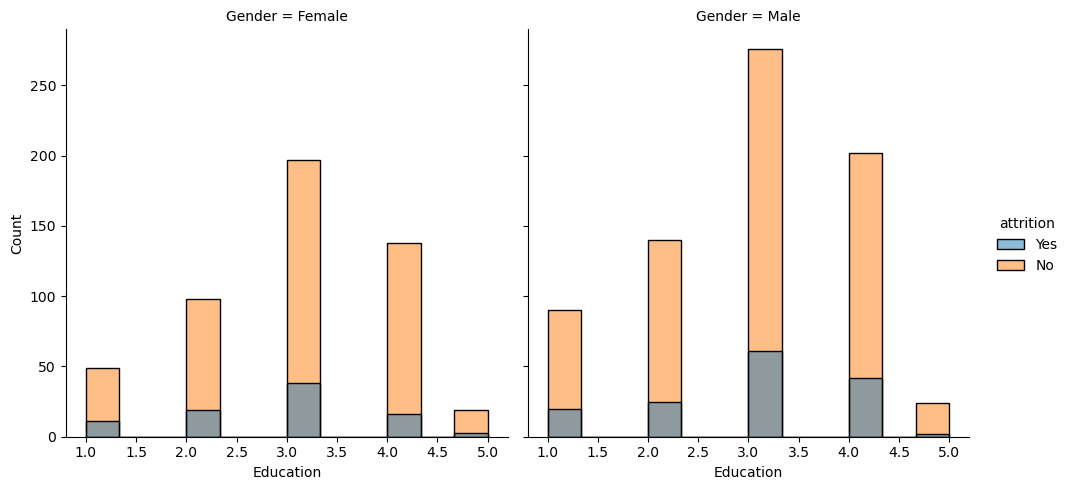

In [23]:
sns.displot(data = df, x = "Education", hue = "attrition", col = "Gender")

In [24]:
"""
minimum DailyRate of employee is 102
maximum DailyRate of employee is 1499
"""

'\nminimum DailyRate of employee is 102\nmaximum DailyRate of employee is 1499\n'

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DailyRate', ylabel='Count'>

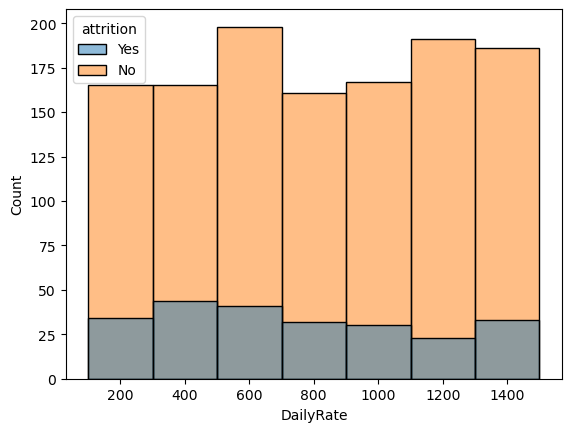

In [25]:
plt.figure()
sns.histplot(data = df, x = "DailyRate", hue = "attrition", bins = 7)

In [26]:
"""
Observation: With histogram bins = 7, the distribution looks almost uniform. By visual inspection of the above histogram, we can say that employees with a Daily rate in between 300 and 500 resign/retire more when compared to other Daily rates. Around 22% of the employees whose Daily rate is in between 300 and 500 resign/retire.
"""

'\nObservation: With histogram bins = 7, the distribution looks almost uniform. By visual inspection of the above histogram, we can say that employees with a Daily rate in between 300 and 500 resign/retire more when compared to other Daily rates. Around 22% of the employees whose Daily rate is in between 300 and 500 resign/retire.\n'

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


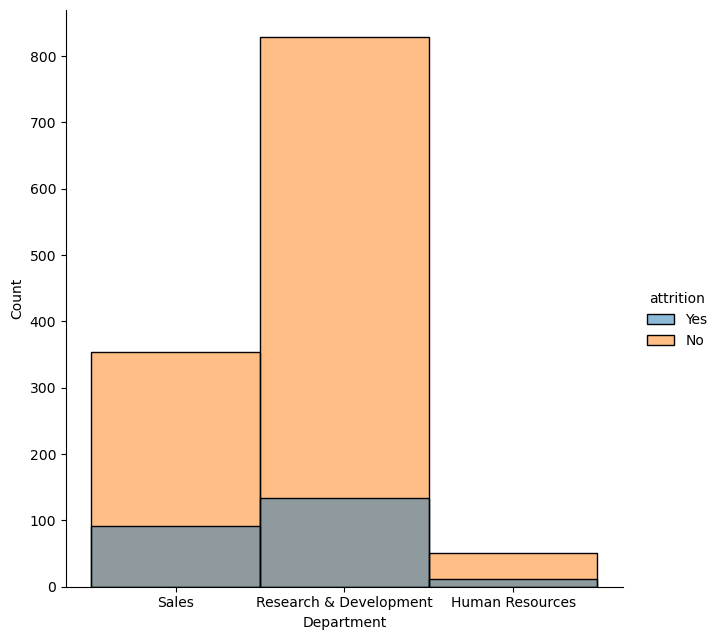

In [27]:
""" 
Department
"""
sns.displot(data = df, x = "Department", hue = "attrition", height = 6.5)

In [29]:
"""
Observation: Absolute number (133) of employees resigning/retiring from R&D is more but percentage-wise Sales (20.6%) and HR (19%) of employees resign/retire from Sales and HR respectively.
"""

'\nObservation: Absolute number (133) of employees resigning/retiring from R&D is more but percentage-wise Sales (20.6%) and HR (19%) of employees resign/retire from Sales and HR respectively.\n'

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


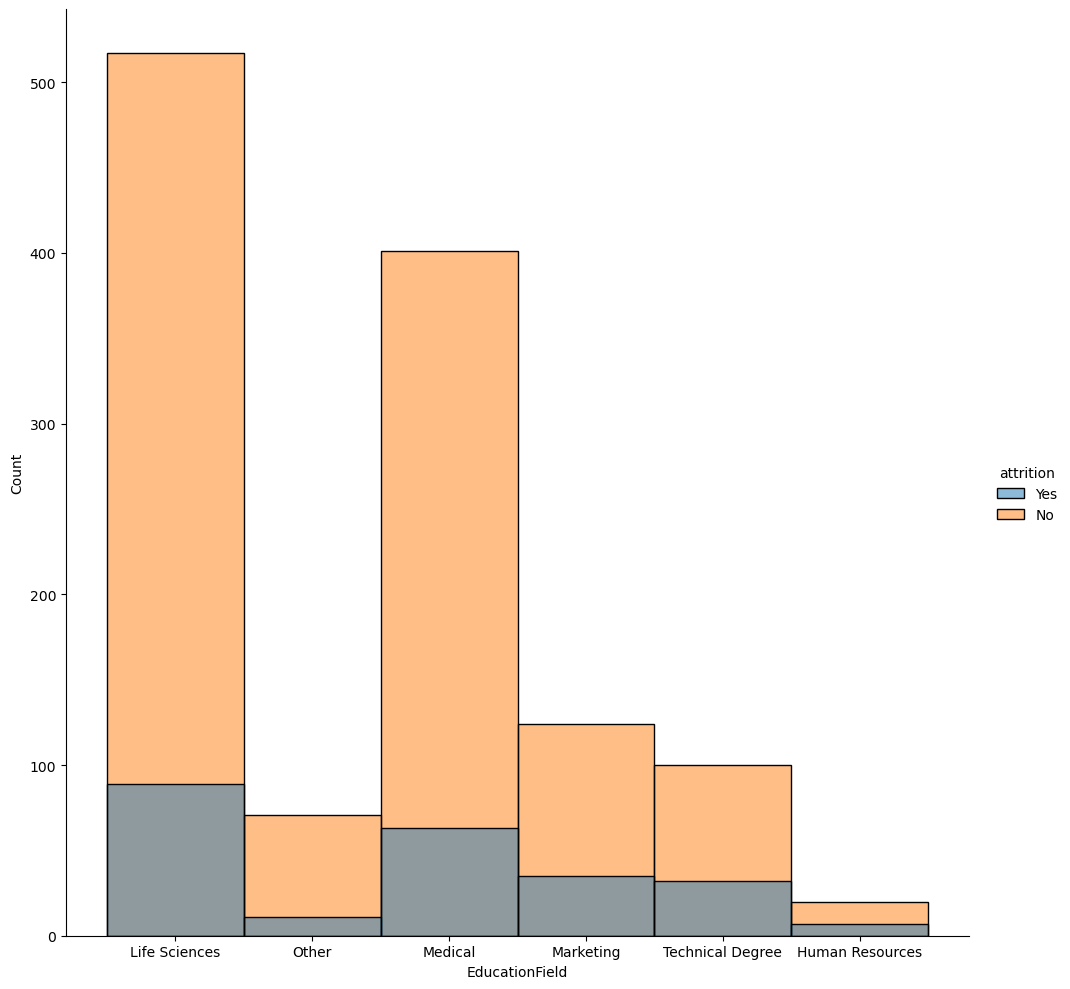

In [30]:
"""Education Field"""
sns.displot(data = df, x = "EducationField", hue = "attrition", height = 10)

In [31]:
"""
Observation: When absolute numbers are compared, employees in Life Sciences Department resign/retire most. But when percentages are compared, employees in HR Department resign/retire most (around 26%).
"""

'\nObservation: When absolute numbers are compared, employees in Life Sciences Department resign/retire most. But when percentages are compared, employees in HR Department resign/retire most (around 26%).\n'

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


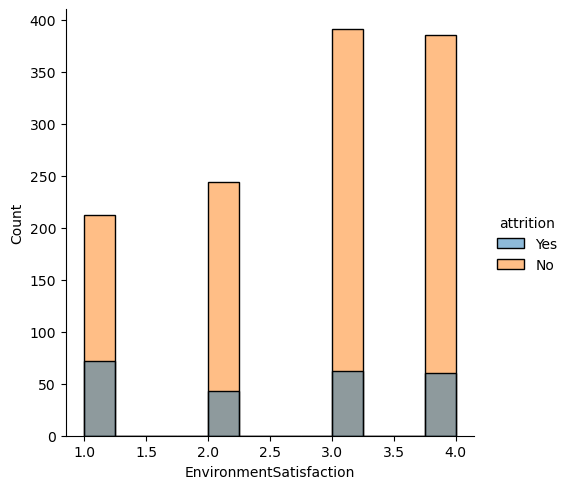

In [32]:
""""EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
"""
sns.displot(data = df, x = "EnvironmentSatisfaction", hue = "attrition")

In [33]:
"""Observation: Above distribution plot clearly shows that employees with ‘Low’ Environment Satisfaction resign/retire more (both in absolute and percentage-wise)."""

'Observation: Above distribution plot clearly shows that employees with ‘Low’ Environment Satisfaction resign/retire more (both in absolute and percentage-wise).'

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


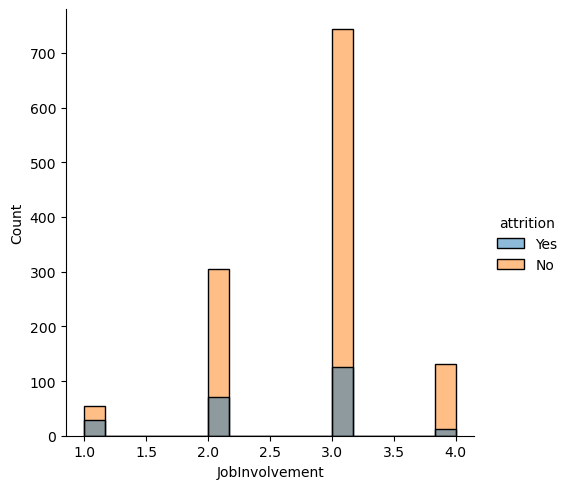

In [34]:
"""
JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
"""
sns.displot(data = df, x = "JobInvolvement", hue = "attrition")

In [35]:
"""Observation: There are fewer employees with Job Involvement = ‘Low’. But around 33% of employees with ‘Low’ Job Involvement resign/retire."""

'Observation: There are fewer employees with Job Involvement = ‘Low’. But around 33% of employees with ‘Low’ Job Involvement resign/retire.'

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


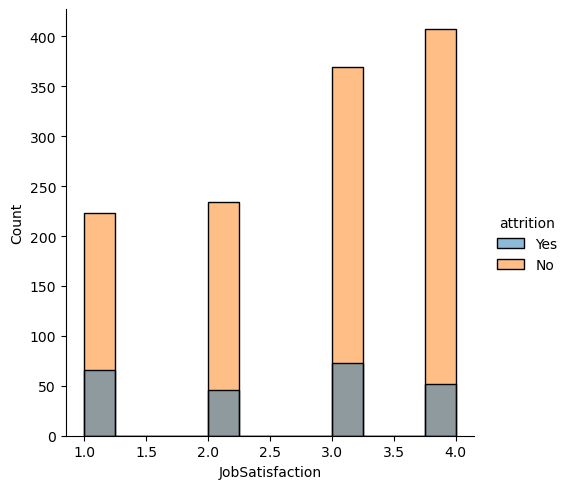

In [36]:
"""
JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
"""
sns.displot(data = df, x = "JobSatisfaction", hue = "attrition")

In [37]:
"""Of all the resigned/retired, employees with ‘High’ Job Satisfaction are maximum but when percentages are compared, employees with ‘Low’ Job Satisfaction is highest."""

'Of all the resigned/retired, employees with ‘High’ Job Satisfaction are maximum but when percentages are compared, employees with ‘Low’ Job Satisfaction is highest.'

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


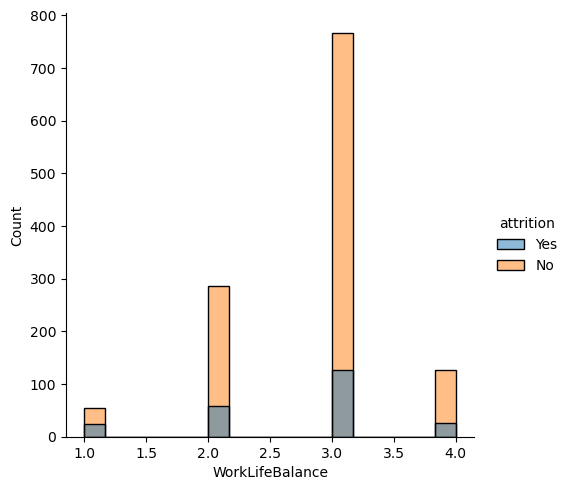

In [38]:
"""
WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'
"""
sns.displot(data = df, x = "WorkLifeBalance", hue = "attrition")

In [39]:
"""Observation: Almost 1/3rd of the employees with ‘Bad’ work-life balance resign/retire."""

'Observation: Almost 1/3rd of the employees with ‘Bad’ work-life balance resign/retire.'

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


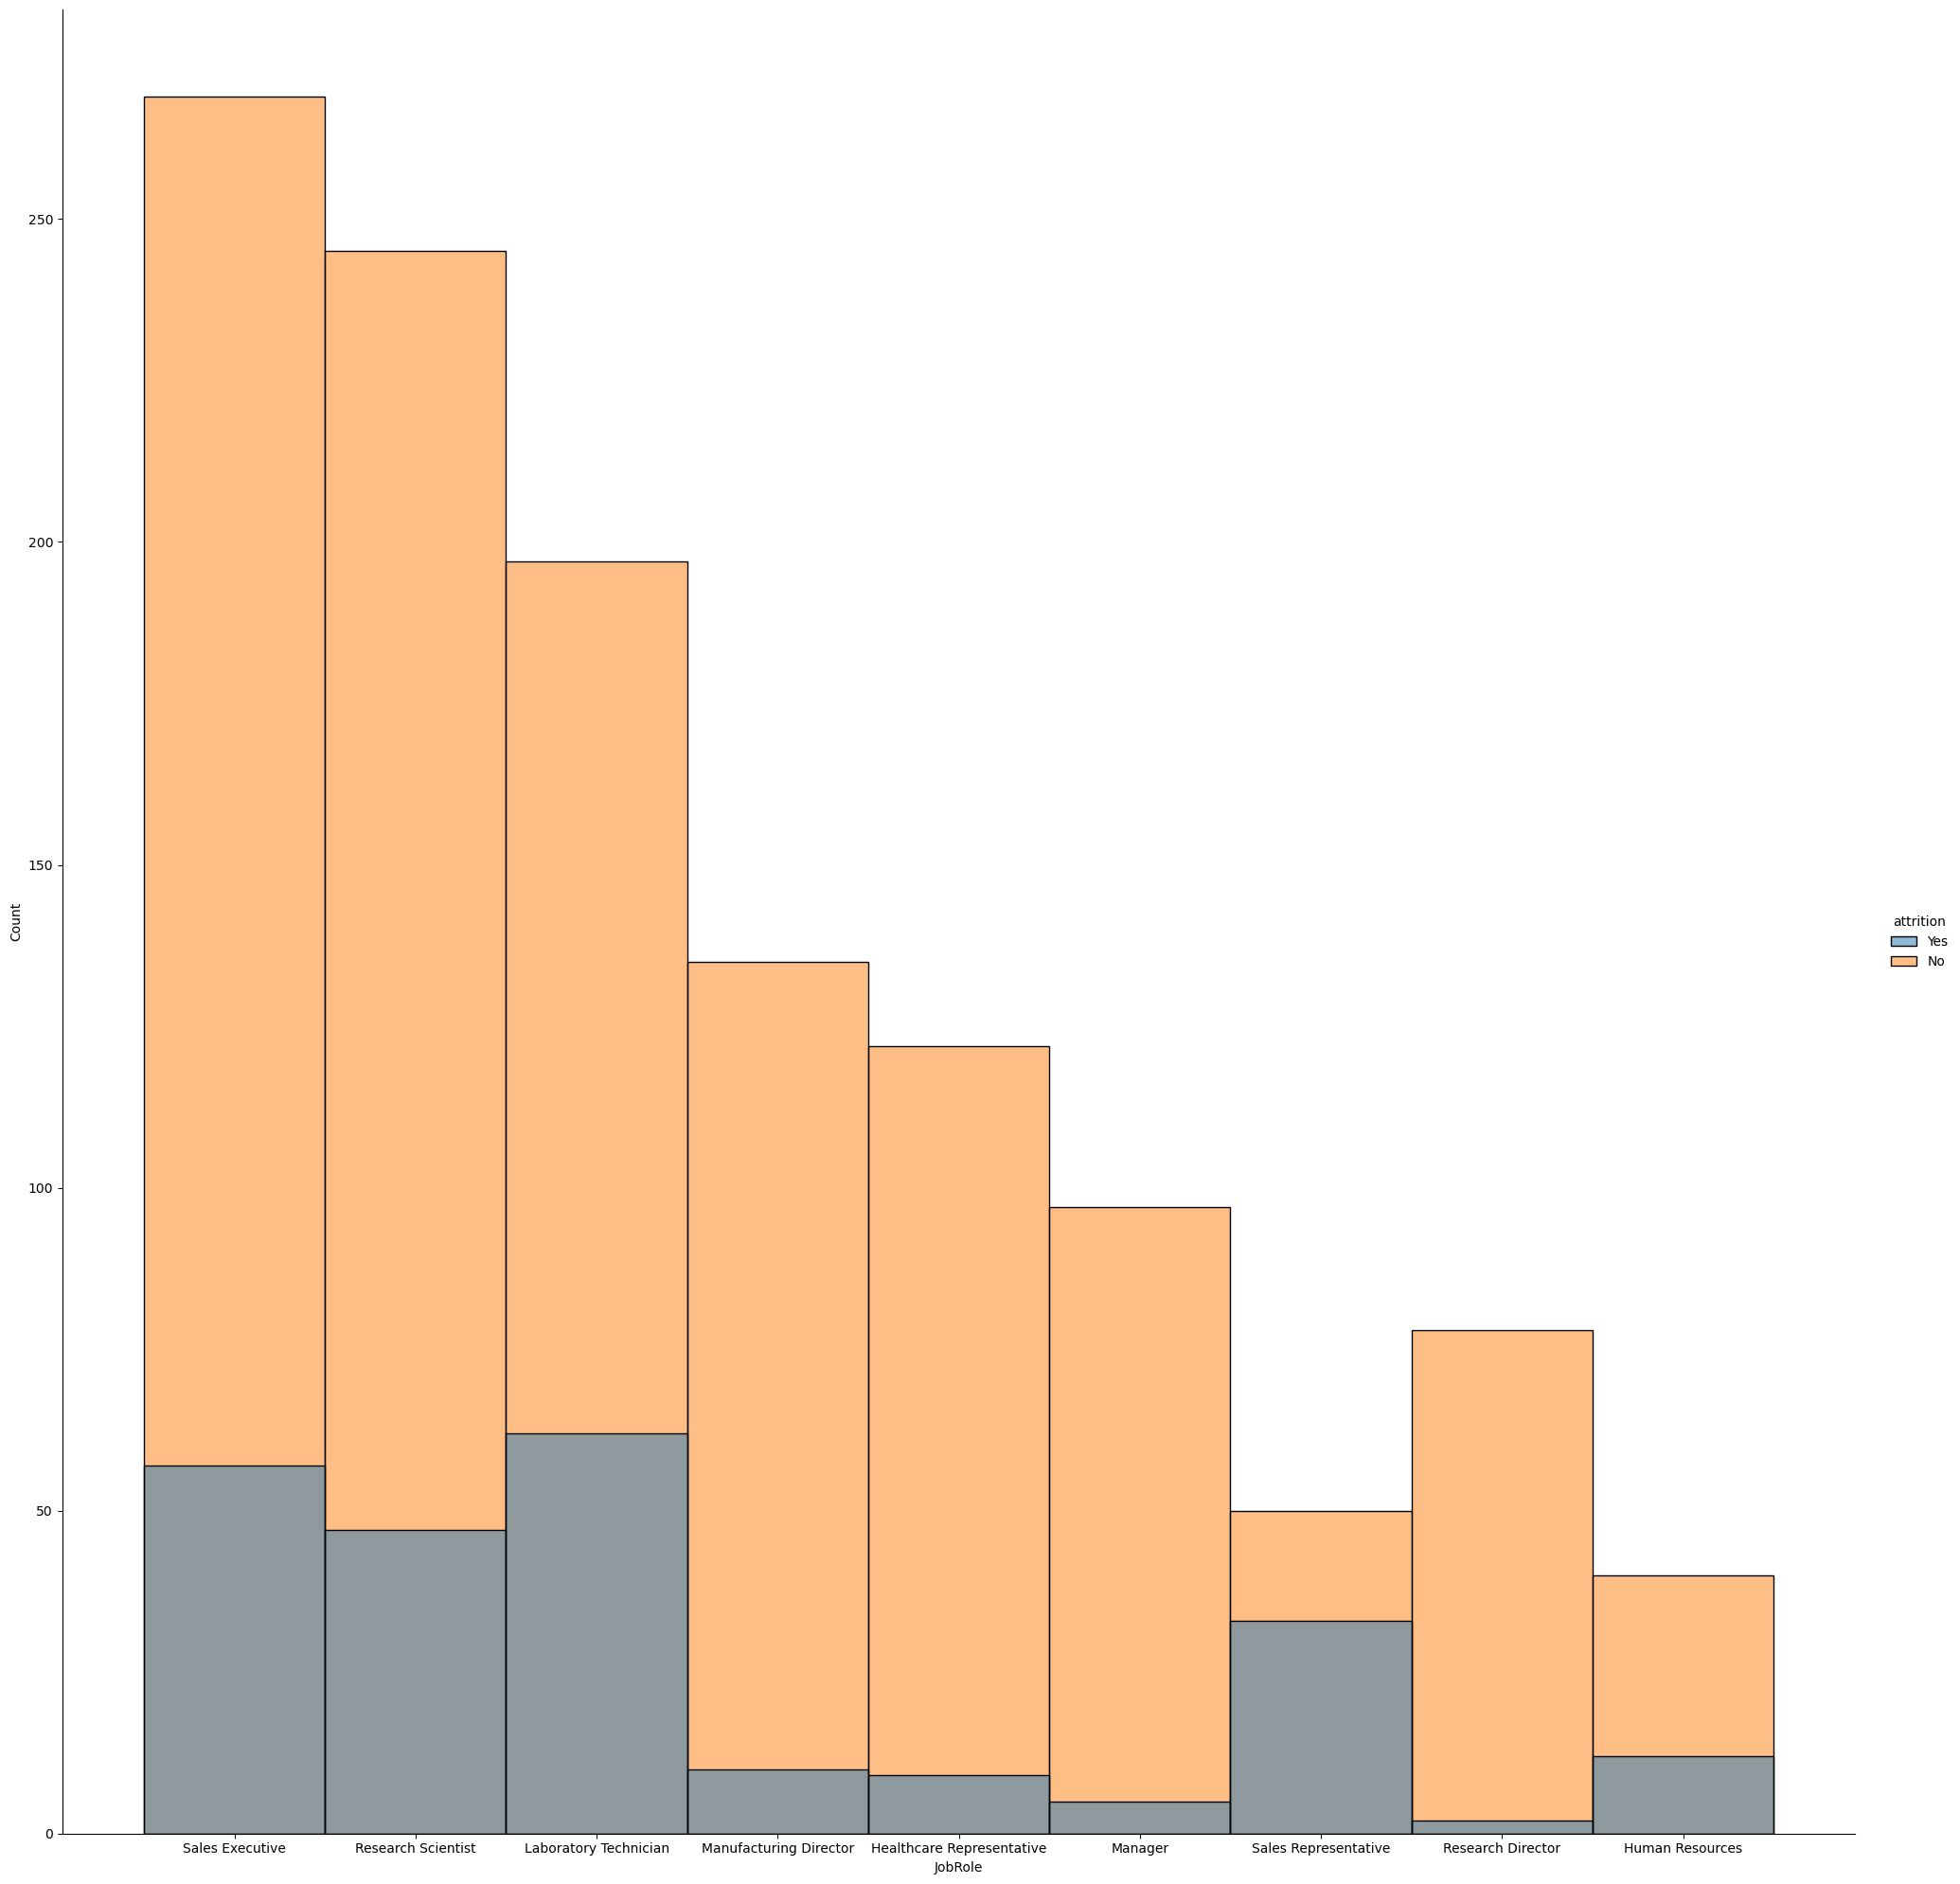

In [40]:
sns.displot(data = df, x = "JobRole", hue = "attrition", height = 20)

In [41]:
"""Observation: Around 40% of people working in the Sales Representative Role resigned/retires, and of all employees resigned/retired, most of them belong to the Laboratory Technician Job Role."""

'Observation: Around 40% of people working in the Sales Representative Role resigned/retires, and of all employees resigned/retired, most of them belong to the Laboratory Technician Job Role.'

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


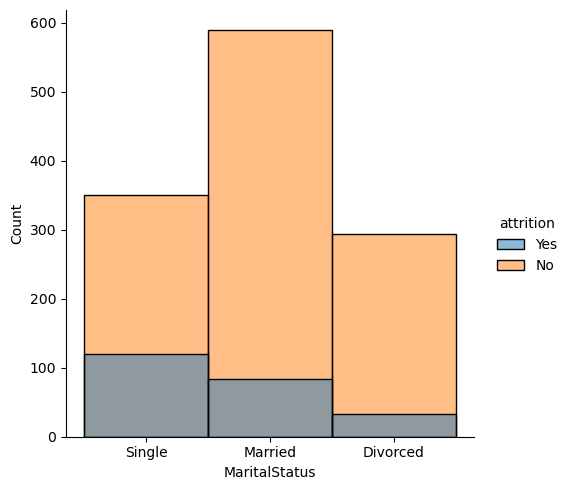

In [44]:
sns.displot(data = df, x = "MaritalStatus", hue = "attrition")

In [45]:
"""Observation: The above distribution plot proves that most married employees settle in the current company and don’t shift companies. Before getting married, employees tend to be growth-oriented and shift companies for better pay, better opportunities, etc."""

'Observation: The above distribution plot proves that most married employees settle in the current company and don’t shift companies. Before getting married, employees tend to be growth-oriented and shift companies for better pay, better opportunities, etc.'

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


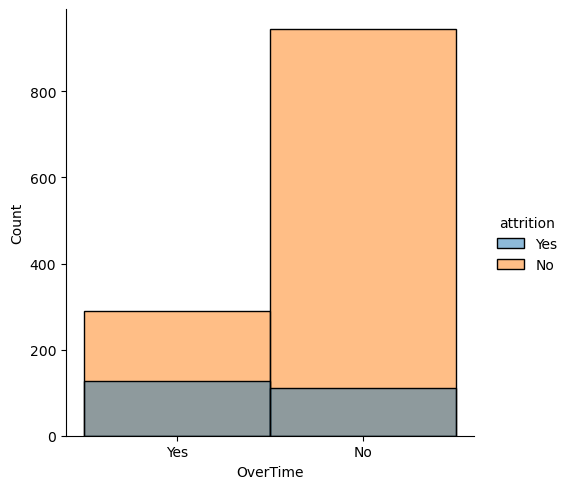

In [46]:
sns.displot(data = df, x = "OverTime", hue = "attrition")

In [47]:
"""Observation: The distribution plot just conveys the message. Almost 33% of employees working overtime resign/retire."""

'Observation: The distribution plot just conveys the message. Almost 33% of employees working overtime resign/retire.'

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


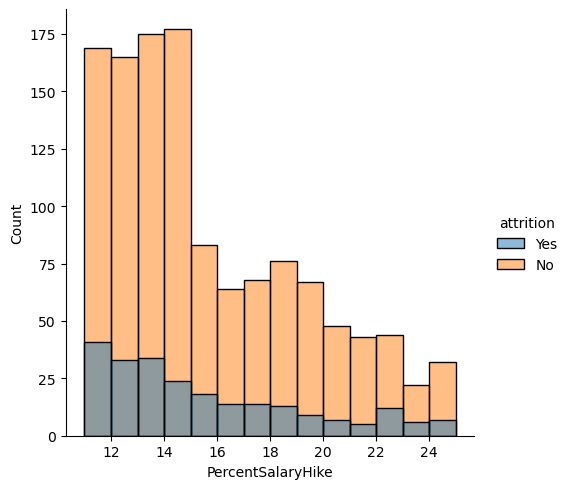

In [48]:
sns.displot(data = df, x = "PercentSalaryHike", hue = "attrition")

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


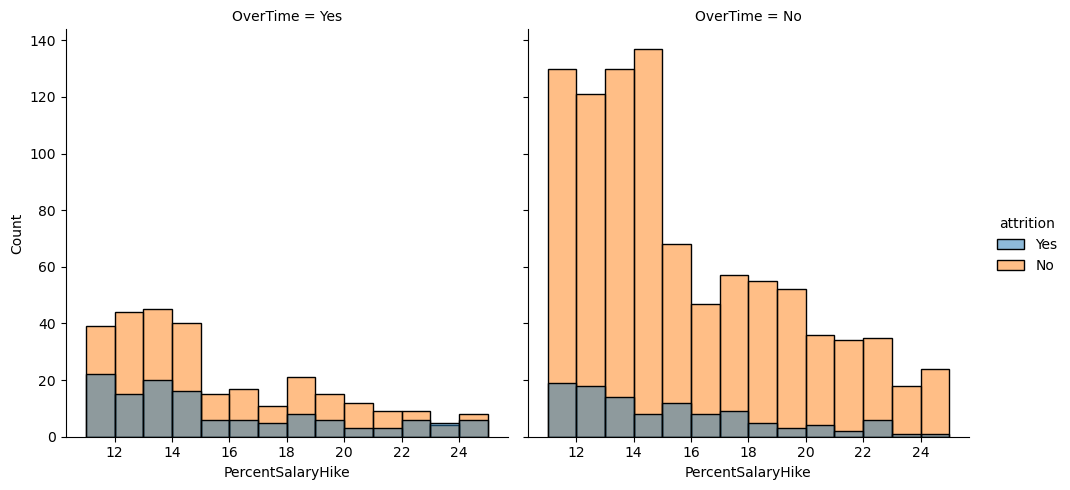

In [49]:
sns.displot(data = df, x = "PercentSalaryHike", hue = "attrition", col = "OverTime")

In [50]:
"""Observation: From the above distribution plot, we can infer that even after working overtime, if employees do get a good salary hike, they resign. But the thing to be noted is working overtime doesn’t mean working productively."""

'Observation: From the above distribution plot, we can infer that even after working overtime, if employees do get a good salary hike, they resign. But the thing to be noted is working overtime doesn’t mean working productively.'

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


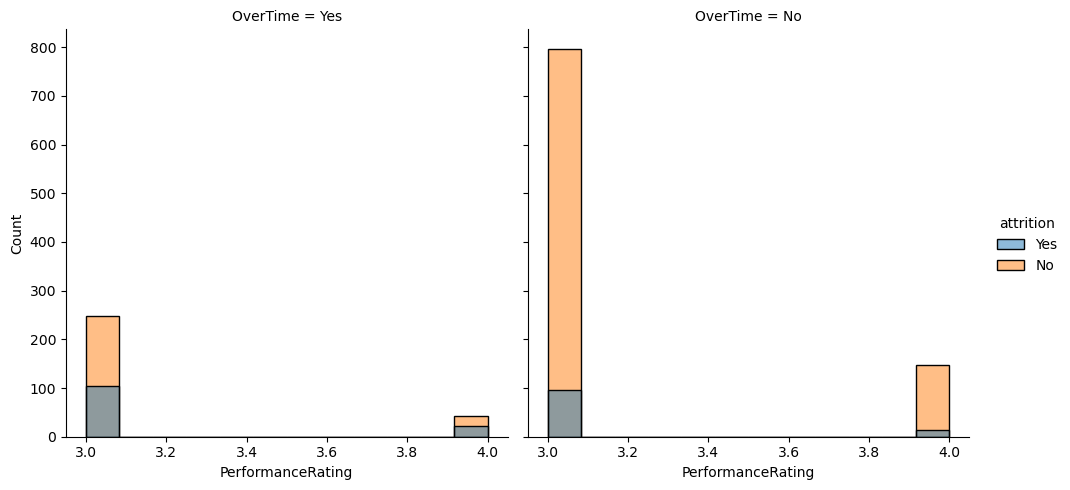

In [52]:
sns.displot(data = df, x = "PerformanceRating", hue = "attrition", col = "OverTime")

In [53]:
"""Observation: The observation for Salary Hike holds true for the above distribution plot too."""

'Observation: The observation for Salary Hike holds true for the above distribution plot too.'

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


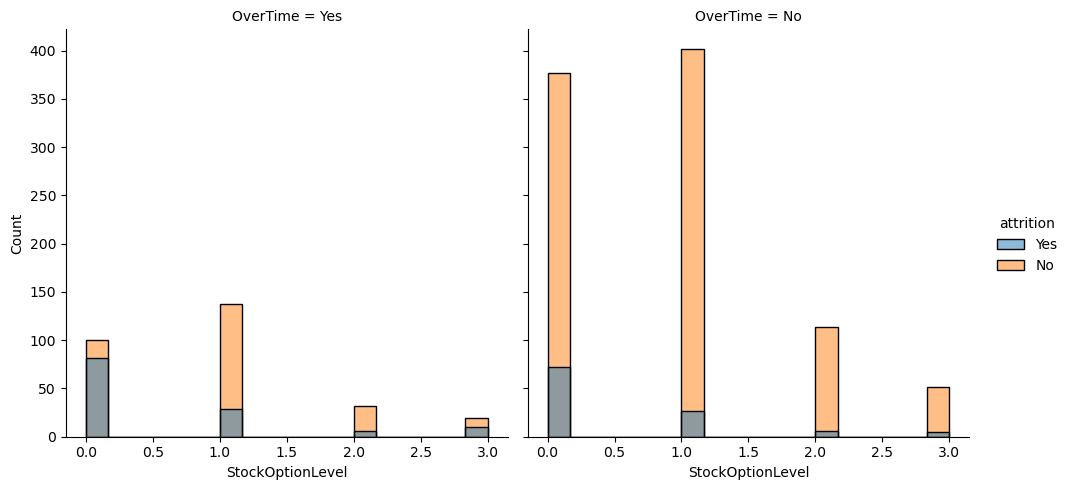

In [54]:
sns.displot(data = df, x = "StockOptionLevel", hue = "attrition", col = "OverTime")

In [55]:
"""Observation: The interesting thing to observe from the above plot is that more than 1/3rd of the overtime working employees with stock option level = 3 resign/retire."""

'Observation: The interesting thing to observe from the above plot is that more than 1/3rd of the overtime working employees with stock option level = 3 resign/retire.'

In [66]:
corr = df.select_dtypes(include=["number"]).corr(method="pearson")

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


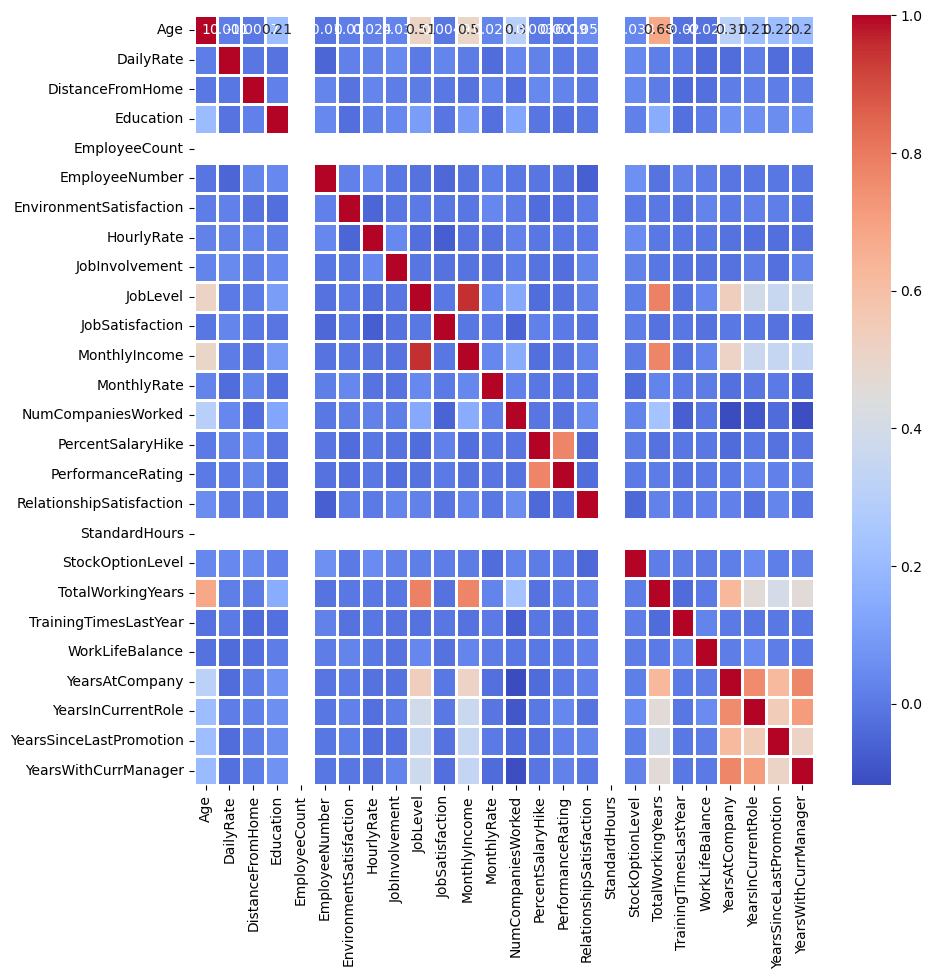

In [69]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, linewidths=1, annot=True, cmap="coolwarm")
plt.show()

<Axes: >

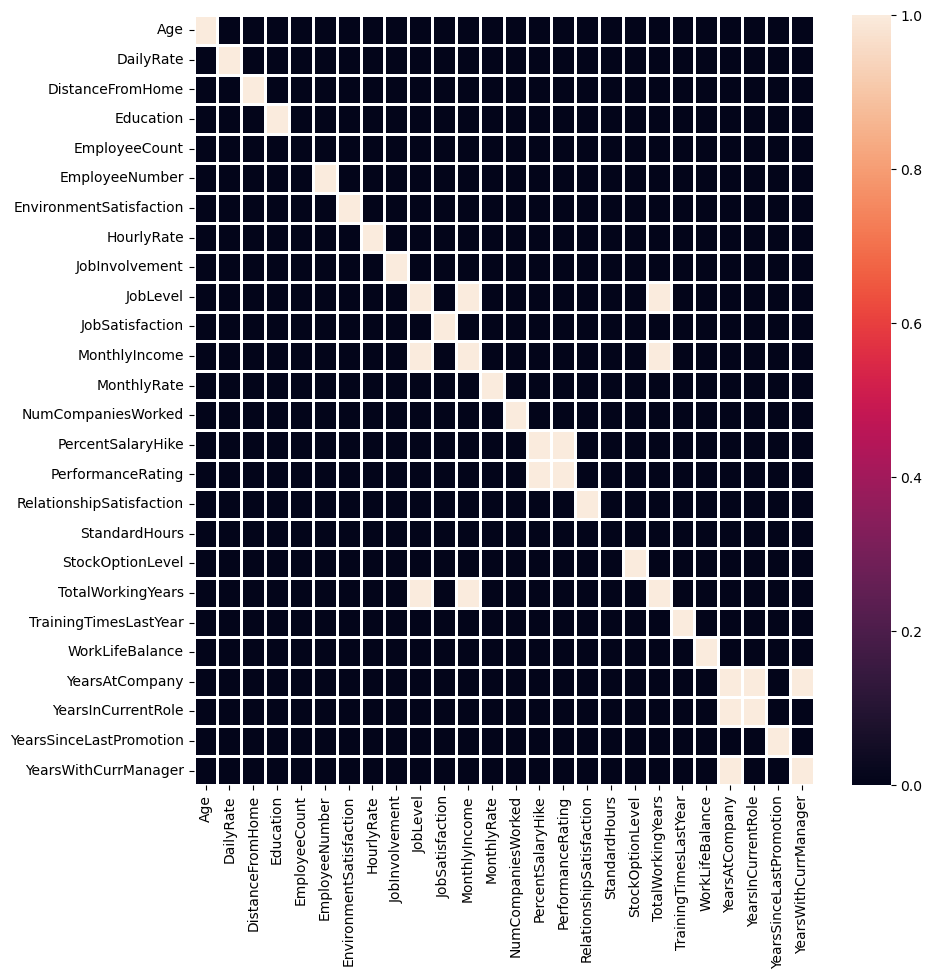

In [70]:
plt.figure(figsize = (10,10))
sns.heatmap(abs(corr) > 0.75, linewidth = 1)

In [73]:
"""Observation: Variables like JobLevel, MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsWithCurrentManager are highly correlated. These variables may lead to multicollinearity. "Conclusion": There are many factors that make an employee resign. Using the IBM dataset, some interesting insights were obtained. These insights can be used to build the model."""

'Observation: Variables like JobLevel, MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsWithCurrentManager are highly correlated. These variables may lead to multicollinearity. "Conclusion": There are many factors that make an employee resign. Using the IBM dataset, some interesting insights were obtained. These insights can be used to build the model.'